#**Assignment 1: Multi-layer perceptron**

Tensorflow's keras without using any of the TensorFlow specific features

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [16]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Print the shape of the training and testing sets
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [55]:
# when download the data from the webset we can do

import pickle
import numpy as np

def load_cifar_batch(file_path):
    with open(file_path, 'rb') as file:
        batch_data = pickle.load(file, encoding='bytes')
    return batch_data

def load_cifar_dataset(folder_path):
    # Load label names from batches.meta
    meta_path = folder_path + '/batches.meta'
    with open(meta_path, 'rb') as file:
        meta_data = pickle.load(file, encoding='bytes')
        label_names = [label.decode('utf-8') for label in meta_data[b'label_names']]

    # Load and concatenate all data batches
    batches = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
    data = []
    labels = []

    for batch_name in batches:
        batch_path = f'{folder_path}/{batch_name}'
        batch_data = load_cifar_batch(batch_path)
        data.append(batch_data[b'data'])
        labels += batch_data[b'labels']

    # Stack all batches along the first axis
    train_images = np.vstack(data)
    train_labels = np.array(labels)

    # Load test batch
    test_path = f'{folder_path}/test_batch'
    test_data = load_cifar_batch(test_path)
    test_images = test_data[b'data']
    test_labels = np.array(test_data[b'labels'])

    return train_images, train_labels, test_images, test_labels, label_names

# Replace 'path/to/your/cifar-10-batches-py' with the actual path where you have extracted the dataset
cifar_folder_path = 'cifar-10-batches-py'

# Load the entire CIFAR-10 dataset
train_images, train_labels, test_images, test_labels, label_names = load_cifar_dataset(cifar_folder_path)

# Display information about the loaded data
print("CIFAR-10 Dataset:")
print("Train Images shape:", train_images.shape)
print("Train Labels shape:", train_labels.shape)
print("Test Images shape:", test_images.shape)
print("Test Labels shape:", test_labels.shape)
print("Label names:", label_names)


CIFAR-10 Dataset:
Train Images shape: (50000, 3072)
Train Labels shape: (50000,)
Test Images shape: (10000, 3072)
Test Labels shape: (10000,)
Label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [56]:
# Reshape the image array, original data is build by channel first and then pixel so we need to reshape and transpose
train_images = train_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 
test_images = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print("Train set shape: ",train_images.shape)
print("Test set shape: ",test_images.shape)

Train set shape:  (50000, 32, 32, 3)
Test set shape:  (10000, 32, 32, 3)


### Q2. Show the first 9 instances of the training dataset.

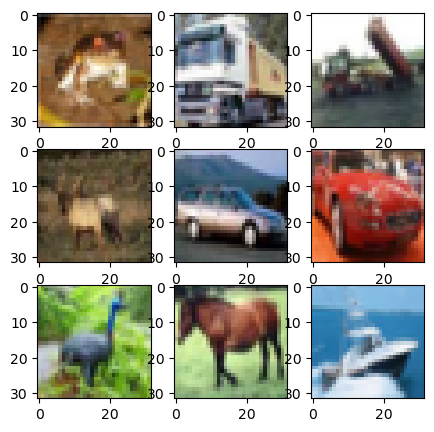

In [57]:
import matplotlib.pyplot as plt

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_images[i], cmap=plt.get_cmap('Greys'))
 
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

### Q3. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [58]:
num_cat = 10
y_train_categorical = keras.utils.to_categorical(train_labels, num_cat)
y_test_categorical = keras.utils.to_categorical(test_labels, num_cat)
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Q4. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [59]:
X_val, X_train, X_test = train_images[:5000]/255.0 , train_images[5000:]/255.0, test_images/255.0
y_val, y_train = y_train_categorical[:5000], y_train_categorical[5000:]
y_val[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## **Model**

### Q5. Create a multi-layer perceptron model with 200 neurons in the first hidden layer and 100 neurons in the second hidden layer, and print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [60]:
X_train.shape[1:]

(32, 32, 3)

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:], name='input'))
model.add(keras.layers.Dense(200, activation = "relu", name='layer_1'))
model.add(keras.layers.Dense(100, activation = "relu", name='layer_2'))
model.add(keras.layers.Dense(10, activation = "softmax", name='output'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 3072)              0         
                                                                 
 layer_1 (Dense)             (None, 200)               614600    
                                                                 
 layer_2 (Dense)             (None, 100)               20100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 635710 (2.43 MB)
Trainable params: 635710 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Q6. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=20**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**



In [62]:
learning_rate = 0.001
batch_size = 512
epochs = 20

In [63]:
X_train.shape

(45000, 32, 32, 3)

In [64]:
model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(learning_rate), metrics = ["accuracy"])
train_model = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = [X_val, y_val]) # 45000 train 45000/512 = 88 sets of batch run 88 time for 1 epoch

Epoch 1/20
88/88 [==============================] - 2s 14ms/step - loss: 2.0447 - accuracy: 0.2646 - val_loss: 1.8806 - val_accuracy: 0.3216
Epoch 2/20
88/88 [==============================] - 1s 9ms/step - loss: 1.8238 - accuracy: 0.3557 - val_loss: 1.7666 - val_accuracy: 0.3664
Epoch 3/20
88/88 [==============================] - 1s 9ms/step - loss: 1.7413 - accuracy: 0.3842 - val_loss: 1.6832 - val_accuracy: 0.4098
Epoch 4/20
88/88 [==============================] - 1s 9ms/step - loss: 1.6741 - accuracy: 0.4084 - val_loss: 1.6417 - val_accuracy: 0.4182
Epoch 5/20
88/88 [==============================] - 1s 9ms/step - loss: 1.6186 - accuracy: 0.4259 - val_loss: 1.6163 - val_accuracy: 0.4274
Epoch 6/20
88/88 [==============================] - 1s 9ms/step - loss: 1.5841 - accuracy: 0.4407 - val_loss: 1.5821 - val_accuracy: 0.4448
Epoch 7/20
88/88 [==============================] - 1s 9ms/step - loss: 1.5509 - accuracy: 0.4522 - val_loss: 1.5783 - val_accuracy: 0.4322
Epoch 8/20
88/88 [=

## **Performance**

### Q7. Evaluate your model.

In [65]:
model.evaluate(X_test, y_test_categorical)

313/313 [==============================] - 0s 1ms/step - loss: 1.4723 - accuracy: 0.4813


[1.472259521484375, 0.4812999963760376]

### Q8. Show the predicted probabilities for the test dataset.

In [66]:
y_pred = model.predict(X_test)
y_pred.round(3)

313/313 [==============================] - 0s 1ms/step


array([[0.05 , 0.065, 0.069, ..., 0.001, 0.075, 0.001],
       [0.017, 0.257, 0.001, ..., 0.   , 0.475, 0.248],
       [0.176, 0.188, 0.004, ..., 0.002, 0.527, 0.1  ],
       ...,
       [0.002, 0.   , 0.094, ..., 0.014, 0.006, 0.002],
       [0.012, 0.019, 0.12 , ..., 0.018, 0.007, 0.014],
       [0.08 , 0.012, 0.15 , ..., 0.24 , 0.027, 0.009]], dtype=float32)

### Q9. Show the predicted labels for the test dataset.


In [67]:
y_pred_class = np.argmax(y_pred,axis=1) # the index of the maximum value along each row
y_pred_class

array([3, 8, 8, ..., 3, 6, 4], dtype=int64)

### Q10. Show the confusion matrix.


In [68]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

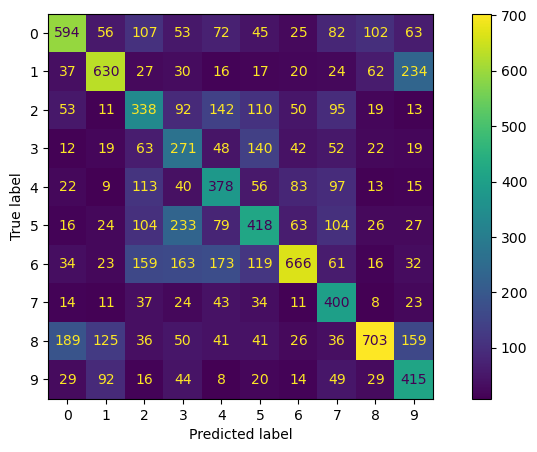

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

## **Post-analysis**

### Q11. Plot the loss and accuracy for the training and validation sets.


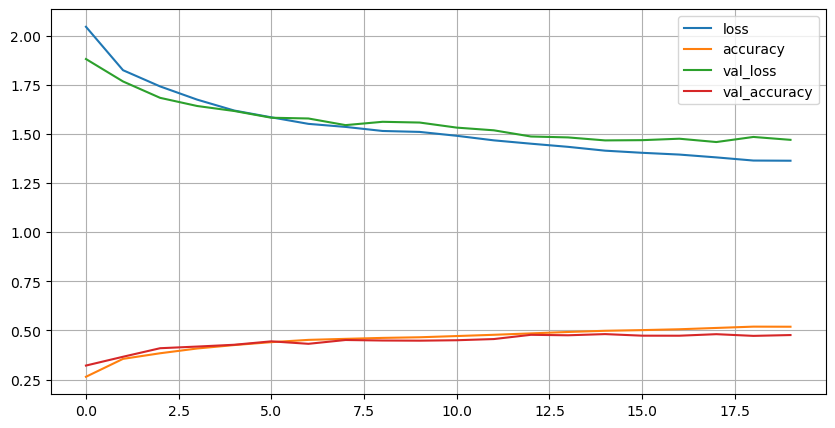

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_model.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()    # axis
plt.show()

### Q12. Show the first 9 images that the actual value is different from the predicted value.

In [71]:
test_labels.shape

(10000,)

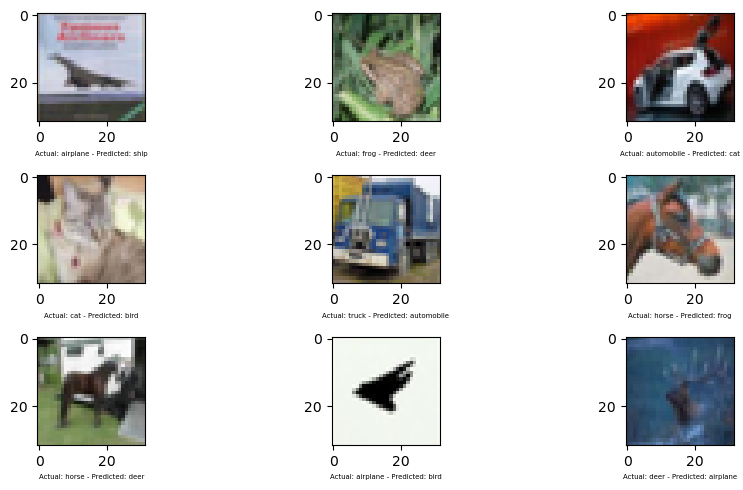

In [72]:
errorCnt = 9
tCnt = 0
index  = 0

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.0001, wspace=0.0001) # to adjust the spacing between subplots

while tCnt < errorCnt and index < len(y_pred_class):
  if y_pred_class[index] != test_labels[index]:
    axes.flat[tCnt].imshow(X_test[index], cmap=plt.get_cmap('viridis'))
    axes.flat[tCnt].set_xlabel("Actual: " + label_names[test_labels[index]] + " - Predicted: " + label_names[y_pred_class[index]], fontsize=5)
    tCnt+=1
  index+=1

plt.tight_layout()
plt.rcParams["figure.figsize"] = (5,5)
plt.show()